In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data=pd.read_csv(r'C:\Users\PC DOCTOR\Desktop\CODSOFT\IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [48]:
df=data[['sepal_length','sepal_width','petal_length','petal_width']]
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


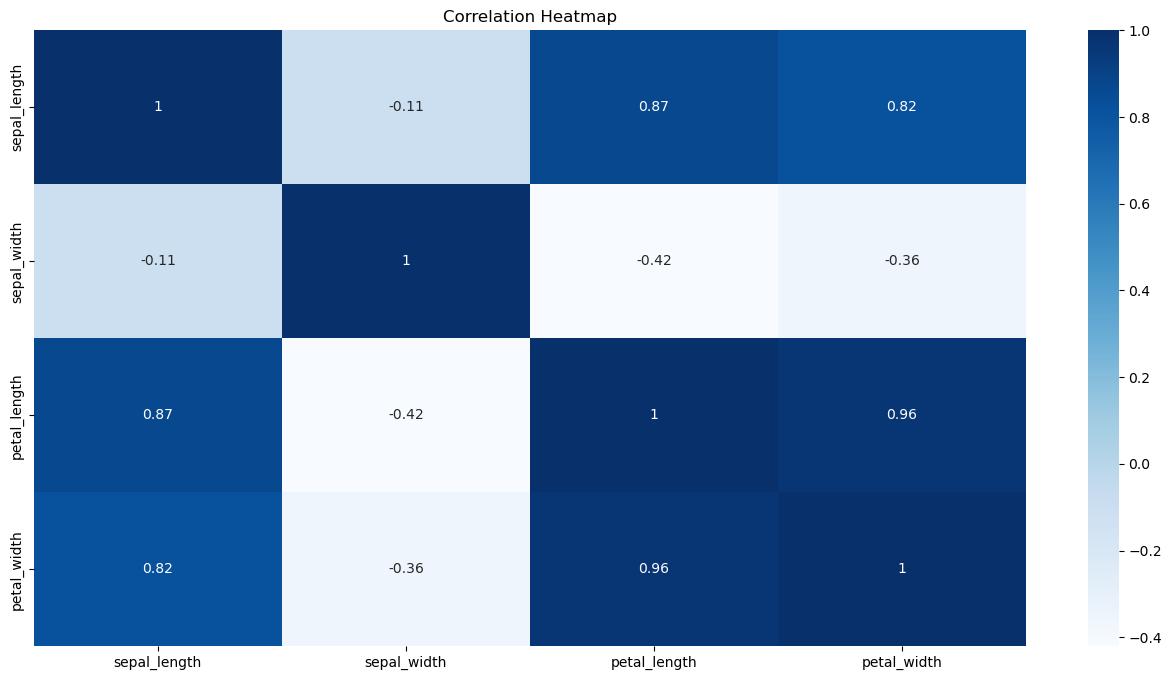

In [50]:
plt.figure(figsize=(16, 8))
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
data.drop('petal_length',axis=1,inplace=True)
data.drop('petal_width',axis=1,inplace=True)

In [52]:
from sklearn import preprocessing
colname=['species']
le=preprocessing.LabelEncoder()
for x in colname:
    data[x]=le.fit_transform(data[x])
    
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)

Feature species
mapping {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [53]:
data.describe()

,sepal_length,sepal_width,species
count,150.000000,150.000000,150.000000
mean,5.843333,3.054000,1.000000
std,0.828066,0.433594,0.819232
min,4.300000,2.000000,0.000000
25%,5.100000,2.800000,0.000000
50%,5.800000,3.000000,1.000000
75%,6.400000,3.300000,2.000000
max,7.900000,4.400000,2.000000


In [55]:
X=data.drop(["species"],axis=1).values
y=data["species"].values

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [68]:
def model_val(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model)

    print(f"Test Data Accuracy: {accuracy_score(y_test,y_pred)}")

    score = cross_val_score(model,X,y,cv=5)
    print(f"Avg cross val score is {np.mean(score)}")

    cm = confusion_matrix(y_test, y_pred)
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
lr = LogisticRegression()
model_val(lr,X_train,X_test,y_train,y_test)

LogisticRegression()
Test Data Accuracy: 0.7777777777777778
Avg cross val score is 0.8200000000000001
Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  7  8]]


In [74]:
from sklearn.svm import SVC
svc = SVC()
model_val(svc,X_train,X_test,y_train,y_test)

SVC()
Test Data Accuracy: 0.7777777777777778
Avg cross val score is 0.82
Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 1  7  7]]


In [80]:
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning (model,params, X_train,X_test,y_train,y_test):
    # Perform grid search cross-validation to find the best hyperparameters
    grid = GridSearchCV(model, params, cv=5, n_jobs=4)
    grid.fit(X_train, y_train)
    best_hyperparameter = grid.best_estimator_

    # Print the best hyperparameters and score found during the grid search
    print("Best parameters:", best_hyperparameter)
    print("Best Accuracy Score: {:.2f}%".format(grid.best_score_ * 100))


    # Predict on the test data using the best model
    y_pred = best_hyperparameter.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    return best_hyperparameter

In [81]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 20],
    'max_iter': [100,200,300],
    "solver":['liblinear']
}
hyperparameter_tuning(lr,lr_params, X_train,X_test,y_train,y_test)

Best parameters: LogisticRegression(C=20, solver='liblinear')
Best Accuracy Score: 83.81%


LogisticRegression(C=20, solver='liblinear')

In [83]:
svc_param = {'C':[0.25,0.50,0.75],"kernel":["linear","poly", "rbf"]}
hyperparameter_tuning(svc,svc_param,X_train,X_test,y_train,y_test)

Best parameters: SVC(C=0.5, kernel='linear')
Best Accuracy Score: 82.86%


SVC(C=0.5, kernel='linear')